In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
#set filenames
genome_file="GENOMES/cajan_one.fasta"
modfrac_file="02_TOMBO/cajan/cajan_barcode07_barcode08_plusmod_corrected.wig"
#modfrac_file="02_TOMBO/cajan/corrected_cajan_barcode07_barcode08_plusmod_corrected.wig"

pd.set_option("display.max_rows", 20, "display.max_columns", None)
#load modfracs
modfrac_df=pd.read_csv(modfrac_file, header=None,skiprows=1, sep=" ")
modfrac_df.columns = ['Position', 'Mod_frac']

#load nucleotides and create combinations
mono=[]
di=[]
tri=[]
tetra=[]
g_file=open(genome_file, "r")
lines=g_file.read().splitlines() 
lines.extend(["X"]*3)
for i in range(len(lines)-3):
    mono.append(lines[i])
    di.append(lines[i]+ lines[i+1])
    tri.append(lines[i]+ lines[i+1] + lines[i+2])
    tetra.append(lines[i]+ lines[i+1] + lines[i+2] + lines[i+3])
d = {'Mononucleotide':mono,'Dinucleotide':di,'Trinucleotide':tri,'Tetranucleotide':tetra}

nucleotides_df = pd.DataFrame(d)

#Merge modfracs and nucleotides
df = nucleotides_df.merge(modfrac_df, left_index=True, right_index=True)

#SIGNIFICANCE THRESHOLD
filter_min=0.4
df=df[df["Mod_frac"]> 0]
#df=df.head(20000)

In [11]:
#df.plot.barh('Position', 'Mod_frac',style='.-', figsize=(10,140))
modfrac_df

,Position,Mod_frac
0,1,-1.0000
1,2,-1.0000
2,3,-1.0000
3,4,-1.0000
4,5,-1.0000
...,...,...
59658,59659,0.3895
59659,59660,0.1328
59660,59661,0.1190
59661,59662,0.0469


In [12]:
mean_modfrac=df["Mod_frac"].mean()
print("Mean modfrac = " + str(mean_modfrac))

Mean modfrac = 0.2741858610747959


# Mononucleotides

In [13]:
Mono=df.groupby(['Mononucleotide'], as_index=False).mean()
Mono.loc[Mono['Mod_frac'] <= filter_min, 'Significative'] = 'False' 
Mono.loc[Mono['Mod_frac'] > filter_min, 'Significative'] = 'True'
Mono

,Mononucleotide,Position,Mod_frac,Significative
0,A,29382.295735,0.258787,False
1,C,30228.904765,0.215856,False
2,G,28891.819524,0.402734,True
3,T,30725.576439,0.232183,False


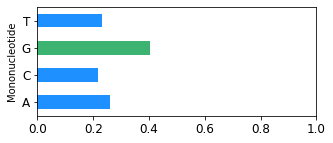

In [14]:
Mono.plot.barh('Mononucleotide', 'Mod_frac',legend=False,xlim=[0,1],figsize=(5,2), fontsize = 12,color=np.where(Mono["Mod_frac"]>filter_min, 'mediumseagreen', 'dodgerblue'))

# Dinucleotides

In [15]:
Di=df.groupby(['Dinucleotide'], as_index=False).mean()
Di.loc[Di['Mod_frac'] <= filter_min, 'Significative'] = 'False' 
Di.loc[Di['Mod_frac'] > filter_min, 'Significative'] = 'True'
Di

,Dinucleotide,Position,Mod_frac,Significative
0,AA,28542.071676,0.236985,False
1,AC,29199.376088,0.264158,False
2,AG,28712.802147,0.300790,False
3,AT,31043.235538,0.248968,False
4,CA,30387.820669,0.170341,False
5,CC,31252.570901,0.166110,False
6,CG,29545.983484,0.318150,False
7,CT,29862.040932,0.215436,False
8,GA,27700.892590,0.721187,True
9,GC,30001.788762,0.263723,False


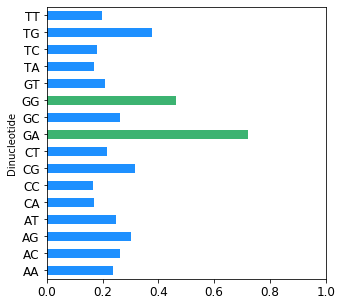

In [9]:
Di.plot.barh('Dinucleotide', 'Mod_frac',xlim=[0,1],legend=False,figsize=(5,5), fontsize = 12 , color=np.where(Di["Mod_frac"]>filter_min, 'mediumseagreen', 'dodgerblue'))

# Trinucleotides

In [8]:
Tri=df.groupby(['Trinucleotide'], as_index=False).mean()
Tri.loc[Tri['Mod_frac'] <= filter_min, 'Significative'] = 'False' 
Tri.loc[Tri['Mod_frac'] > filter_min, 'Significative'] = 'True'
Tri

,Trinucleotide,Position,Mod_frac,Significative
0,AAA,28341.758501,0.273900,False
1,AAC,27945.244101,0.234624,False
2,AAG,26945.817536,0.286456,False
3,AAT,30941.921924,0.232778,False
4,ACA,28696.058462,0.231701,False
...,...,...,...,...
59,TGT,31319.993859,0.178990,False
60,TTA,30875.933582,0.160095,False
61,TTC,31966.587204,0.166916,False
62,TTG,30465.094880,0.350535,False


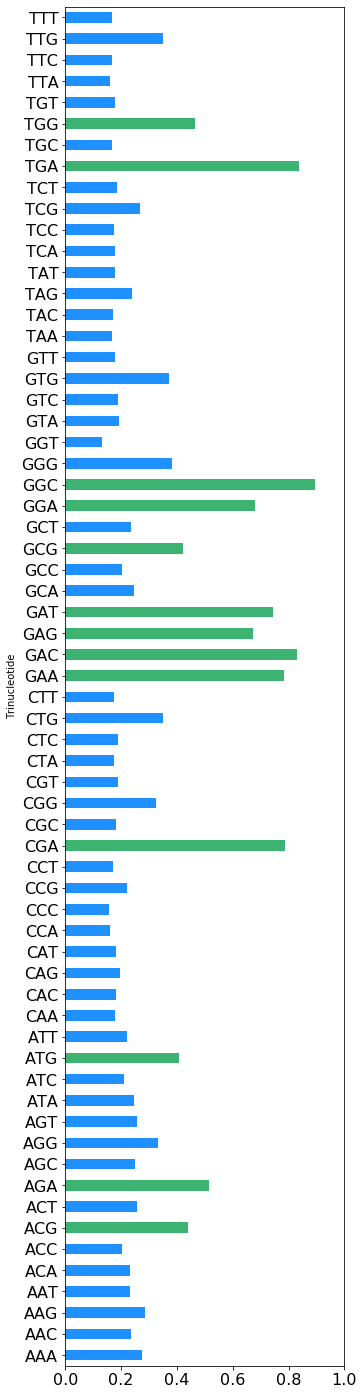

In [9]:
Tri.plot.barh('Trinucleotide', 'Mod_frac',xlim=[0,1],legend=False,figsize=(5,25), fontsize = 16, color=np.where(Tri["Mod_frac"]>filter_min, 'mediumseagreen', 'dodgerblue'))

# Tetranucleotides

In [10]:
Tetra=df.groupby(['Tetranucleotide'], as_index=False).mean()
Tetra.loc[Tetra['Mod_frac'] <= filter_min, 'Significative'] = 'False' 
Tetra.loc[Tetra['Mod_frac'] > filter_min, 'Significative'] = 'True'
Tetra

,Tetranucleotide,Position,Mod_frac,Significative
0,AAAA,26944.817935,0.284936,False
1,AAAC,28969.016854,0.254076,False
2,AAAG,26826.589744,0.282977,False
3,AAAT,30589.284153,0.273382,False
4,AACA,26804.951456,0.242638,False
...,...,...,...,...
251,TTGT,32705.009288,0.145811,False
252,TTTA,33475.793349,0.174947,False
253,TTTC,34242.674772,0.155829,False
254,TTTG,32427.919771,0.170961,False


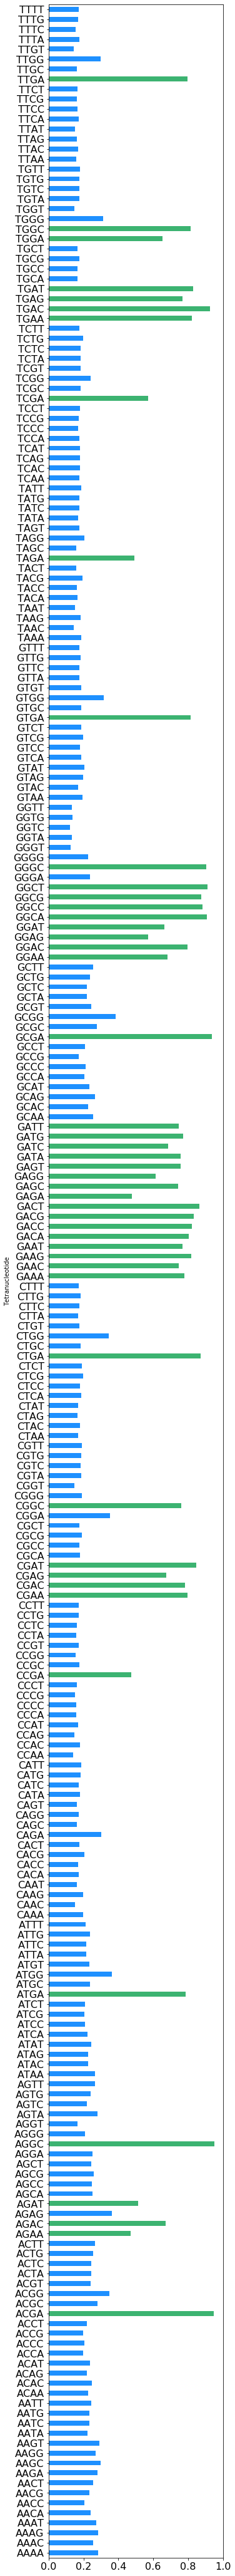

In [11]:
Tetra_filt=Tetra[Tetra.Mod_frac>filter_min-0.4]
Tetra_filt.plot.barh('Tetranucleotide', 'Mod_frac',xlim=[0,1],legend=False,figsize=(5,75), fontsize = 16,color=np.where(Tetra_filt["Mod_frac"]>filter_min, 'mediumseagreen', 'dodgerblue'))

In [12]:
df

,Mononucleotide,Dinucleotide,Trinucleotide,Tetranucleotide,Position,Mod_frac
5,C,CG,CGG,CGGG,6,0.1954
6,G,GG,GGG,GGGG,7,0.5366
7,G,GG,GGG,GGGC,8,1.0000
8,G,GG,GGC,GGCA,9,0.9921
9,G,GC,GCA,GCAA,10,0.9583
...,...,...,...,...,...,...
59658,A,AA,AAG,AAGG,59659,0.2475
59659,A,AG,AGG,AGGG,59660,0.1138
59660,G,GG,GGG,GGGG,59661,0.1638
59661,G,GG,GGG,GGGG,59662,0.1961
